<a href="https://colab.research.google.com/github/pedroblossbraga/MachineLearning-Pre-Processing-with-Python/blob/master/Effects_of_transformations_in_XGBoostRegressor_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tests with different data transformations applied to XGBoost

Samples:
- original data
- linearly transformated data
- minmax scaled data
- pseudo-random data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from IPython.display import display

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

In [6]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [7]:
# lidar com os valores ausentes
df_imputer = SimpleImputer()
train_X = df_imputer.fit_transform(train_X)
test_X = df_imputer.transform(test_X)

In [8]:
def test_XGBoost(train_X, train_y, test_X, test_y, plot_residuals=True):
  # instanciar o modelo XGBoost
  model = XGBRegressor()
  
  # chamar o fit para o modelo
  model.fit(train_X, train_y, verbose=False)
  
  # fazer previsões em cima do dataset de teste
  predictions = model.predict(test_X)
  
  print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(predictions, test_y)))
  if plot_residuals:
    plt.figure(figsize=(15,3))
    plt.subplot(1,2,1)
    plt.title("predictions")
    sns.distplot(predictions)
    plt.axvline(statistics.mean(predictions), color='red')

    plt.subplot(1,2,2)
    plt.title(r'residuals $\epsilon = |\hat{y} - y|$')
    sns.distplot(abs(predictions-test_y))
    plt.axvline(statistics.mean(abs(predictions-test_y)), color='red')

    plt.show()

    return mean_absolute_error(y_pred=predictions, y_true=test_y), mean_squared_error(y_true=test_y, y_pred=predictions)

### original data

[12:05:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 1.95


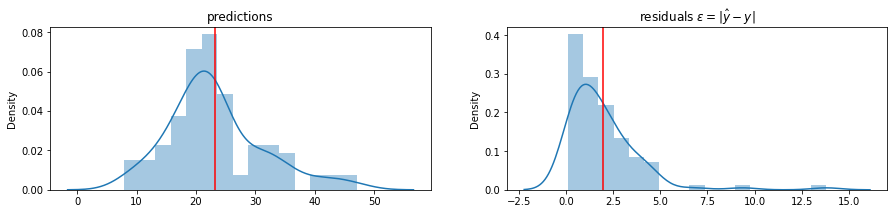

In [9]:
mae0, mse0 = test_XGBoost(train_X, train_y, test_X, test_y)

### linearly transformed

\begin{equation}
X_1 = \{x_j + k\}_{j=1}^N, k \in \mathbb{N}
\end{equation}

[12:05:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 1.96


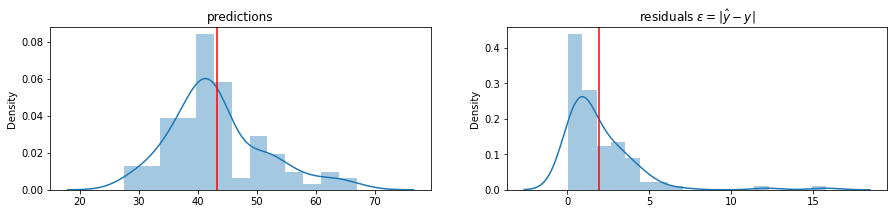

In [10]:
k=20
mae1, mse1 = test_XGBoost(train_X+k, train_y+k, test_X+k, test_y+k)

### Min-Max scaled

\begin{equation}
\hat{X} = \left\{ \frac{x_j - min \{ X \} }{max \{ X \} - min \{ X \} } \right\}_{j=1}^N
\end{equation}

[12:05:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 0.06


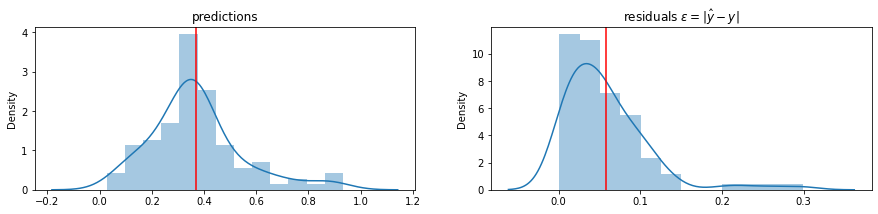

In [11]:
def minmaxscale(v):
  return (v - v.min(axis=0))/(v.max(axis=0)-v.min(axis=0))

mae2, mse2 = test_XGBoost(
    minmaxscale(train_X), 
    minmaxscale(train_y), 
    minmaxscale(test_X), 
    minmaxscale(test_y)
)

In [12]:
import numpy as np

def randomize_matrix(X):
  X_ = X.copy()
  if len(X_.shape)==1: # vector
    for i in range(X_.shape[0]):
      X_[i] = np.random.randint(-20, 20)
  else: # matrix
    for lin in range(X_.shape[0]):
      for col in range(X_.shape[1]):
        X_[lin][col] = np.random.randint(-20, 20)
  return X_

### Pseudo-random data

[12:05:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 11.33


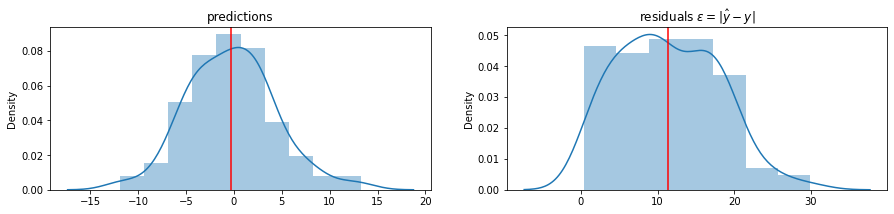

In [13]:
mae3, mse3 = test_XGBoost(
    randomize_matrix(train_X), 
    randomize_matrix(train_y), 
    randomize_matrix(test_X), 
    randomize_matrix(test_y)
)

In [15]:
erros = {
    'MAE': [mae0, mae1, mae2, mae3],
    'MSE': [mse0, mse1, mse2, mse3],
    'transf': ['original', 'linear', 'minmax', 'pseudo-random']
}

display(pd.DataFrame(erros))

,MAE,MSE,transf
0,1.947568,7.555698,original
1,1.960215,8.868490,linear
2,0.057456,0.006035,minmax
3,11.327111,170.878044,pseudo-random
